# Titanic dataset - Data Cleansing
This notebook contains some basic data cleansing on the Titanic dataset

## Initial stage using simple data cleansing methods

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
titanic = sns.load_dataset('titanic')

#Display the initial few rows of the dataset
titanic.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
#1. Identify Missing Data
print("\nInitial Missing Values Count:")
print(titanic.isnull().sum())


Initial Missing Values Count:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:
#2. Imputation: Fill missing 'age' data with the median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

#3. Imputation: Fill missing 'embarked' data with the mode (most frequent value)
most_frequent_embarked = titanic['embarked'].value_counts().idxmax()
titanic['embarked'].fillna(most_frequent_embarked, inplace=True)

#4. Dropping columns: Drop 'deck' as it has too many missing values
titanic.drop(columns='deck', inplace=True)

#5. Convert categorical data to numeric: Convert 'sex' to numerical values (0 for male and 1 for female)
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

#6. One-hot encoding: Convert 'embarked' to one-hot encoded columns
titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

#Display the cleaned data
print("\nData after Cleansing:")
titanic.head()



Data after Cleansing:


,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,0,1
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,0,0
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0,1
3,1,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,0,1
4,0,3,0,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0,1


In [10]:
#Display the count of missing values after data cleansing
print("\nMissing Values Count after Data Cleansing:")
titanic.isnull().sum()


Missing Values Count after Data Cleansing:


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
embarked_Q     0
embarked_S     0
dtype: int64

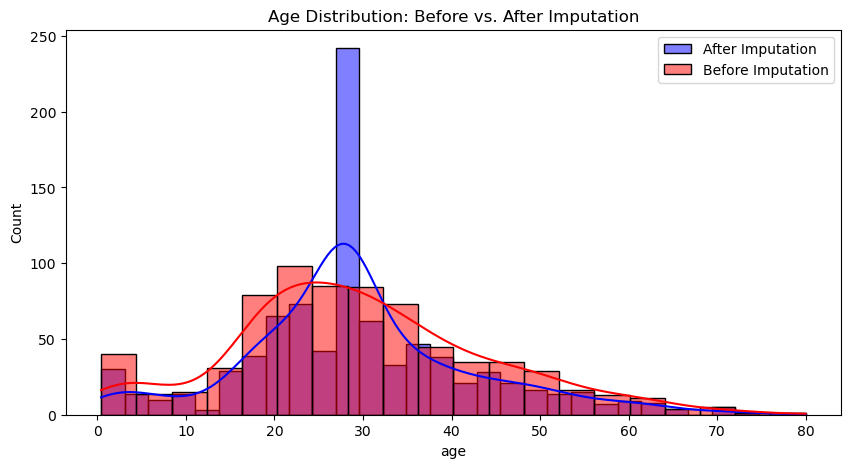

In [11]:
#Visualisation: Compare age distributions before and after imputation
plt.figure(figsize=(10, 5))
sns.histplot(titanic['age'], kde=True, label='After Imputation', color='blue')
sns.histplot(sns.load_dataset('titanic')['age'], kde=True, label='Before Imputation', color='red', alpha=0.5)
plt.title('Age Distribution: Before vs. After Imputation')
plt.legend()
plt.show()

## Using more sophisticated techniques

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# Load the dataset
titanic = sns.load_dataset('titanic')

# Display the initial few rows of the dataset
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
#1. Identify Missing Data
print("\nInitial Missing Values Count:")
print(titanic.isnull().sum())



Initial Missing Values Count:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [14]:
#2. KNN Imputation for 'age' and 'fare'
imputer = KNNImputer(n_neighbors=5)
titanic[['age', 'fare']] = imputer.fit_transform(titanic[['age', 'fare']])

#3. Handle Outliers: Identify and handle outliers for 'age'
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Replace outliers with respective boundaries
titanic['age'] = np.where(titanic['age'] < lower_bound, lower_bound, titanic['age'])
titanic['age'] = np.where(titanic['age'] > upper_bound, upper_bound, titanic['age'])

#4. Feature Engineering: 'FamilySize'
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch']

#5. Convert categorical data to numeric: Convert 'sex' to numerical values (0 for male and 1 for female)
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

#6. One-hot encoding: Convert 'embarked' to one-hot encoded columns
titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

#7. Dropping columns: Drop 'deck' and other less relevant columns
titanic.drop(columns=['deck', 'alive', 'who', 'embark_town', 'adult_male'], inplace=True)

#Display the cleaned data 
print("\nData after Advanced Cleansing:")
titanic.head()


Data after Advanced Cleansing:


,survived,pclass,sex,age,sibsp,parch,fare,class,alone,FamilySize,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,False,1,0,1
1,1,1,1,38.0,1,0,71.2833,First,False,1,0,0
2,1,3,1,26.0,0,0,7.9250,Third,True,0,0,1
3,1,1,1,35.0,1,0,53.1000,First,False,1,0,1
4,0,3,0,35.0,0,0,8.0500,Third,True,0,0,1


In [16]:
#Display the count of missing values after advanced data cleansing
print("\nMissing Values Count after Advanced Data Cleansing:")
titanic.isnull().sum()


Missing Values Count after Advanced Data Cleansing:


survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
class         0
alone         0
FamilySize    0
embarked_Q    0
embarked_S    0
dtype: int64

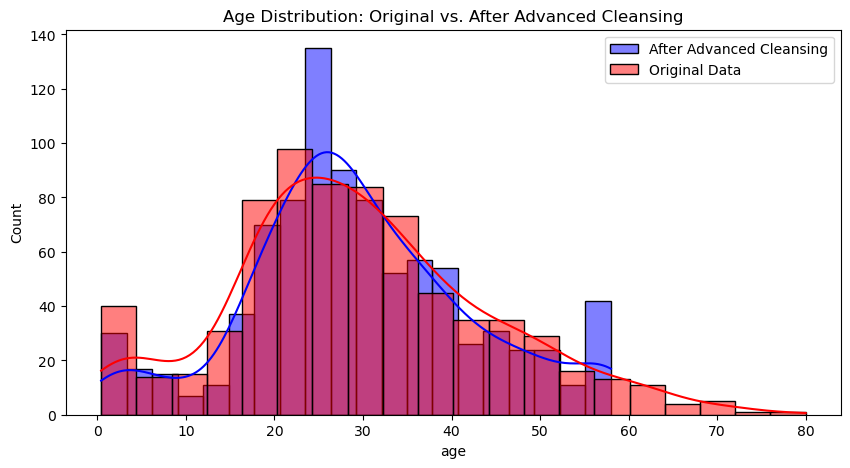

In [17]:
# Visualization: Compare age distributions before and after imputation
plt.figure(figsize=(10, 5))
sns.histplot(titanic['age'], kde=True, label='After Advanced Cleansing', color='blue')
sns.histplot(sns.load_dataset('titanic')['age'], kde=True, label='Original Data', color='red', alpha=0.5)
plt.title('Age Distribution: Original vs. After Advanced Cleansing')
plt.legend()
plt.show()

Comparing our two visualisations, we see that the more advanced techniques have produced a much more desirable outcome.